# Prosper Loan Data Exploration
## by Magon Bowling

## Investigation Overview

My investigation is the relationships between homeowners, their employment status durations and incomes and their impact on debt to income ratios and credit score ranges.  As I strive to make my own well-informed financial decisions, I find that data is honest.  I want to know more about how employment impacts individuals owning their own home and living with debt.  Do individuals who earn more money have less debt to income ratio?  Do individuals who make more money own their own home?  Do individuals with higher incomes have higher credit scores and borrow more money?  My investigation will strive to answer those questions.

## Dataset Overview

The Prosper Loan dataset contains 113,937 loans with 81 variables on each loan.  My analysis and visualizations will focus on the following key features:

Employment Status Duration | Is Borrower a Homeowner | Income Range | Credit Score Range | Debt to Income Ratio

I will lead you through my investigation systematically, starting with single variables followed by relationships between two and then three features.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData_clean.csv')

## Homeowners | Income Ranges | Credit Score Ranges

There are more homeowners than not that obtain short term loans from Prosper.  The majority of individuals fall within the income range of `$25,000-49,999` and `$50,000-74,999`.  Credit score ranges are within 20 points.  We see that there is a normal distribution of credit score ranges.  This information reveals that the majority of individuals earn less than `$75,000` but have credit scores within 640 and 800 points.

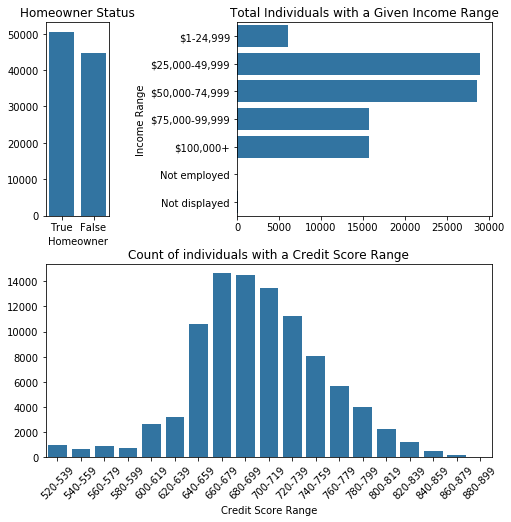

In [3]:
# Visualization 1: count plots
fig = plt.figure(figsize = [8,8])
plt.subplots_adjust(wspace = 2, hspace = 0.25)
# set up subplot grid
gridspec.GridSpec(2,3)
base_color = sb.color_palette()[0]

plt.subplot2grid((2,3), (0,0), colspan = 1, rowspan = 1)
home_order = df['IsBorrowerHomeowner'].value_counts().index
sb.countplot(data = df, x = 'IsBorrowerHomeowner', color = base_color, order = home_order)
plt.xlabel('Homeowner')
plt.ylabel('')
plt.title('Homeowner Status');

plt.subplot2grid((2,3), (0,1), colspan = 2, rowspan = 1)
inrange_order = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not employed', 'Not displayed']
sb.countplot(data = df, y = 'IncomeRange', color = base_color, order = inrange_order)
plt.ylabel('Income Range')
plt.xlabel('')
plt.title('Total Individuals with a Given Income Range');

plt.subplot2grid((2,3), (1,0), colspan = 3, rowspan = 1)
csrange_order = ['520-539', '540-559', '560-579', '580-599', '600-619',
                  '620-639', '640-659', '660-679', '680-699', '700-719',
                  '720-739', '740-759', '760-779', '780-799', '800-819',
                  '820-839', '840-859', '860-879', '880-899']
sb.countplot(data = df, x = 'CreditScoreRange', color = base_color, order = csrange_order)
plt.xlabel('Credit Score Range')
plt.ylabel('')
plt.title('Count of individuals with a Credit Score Range')
plt.xticks(rotation = 45);

## Employment Status Duration

Short term employment is most popular among individuals who borrow money from Prosper.  Long term employees are more frequent over time.  The distribution of employment status durations is similar to exponential decay.

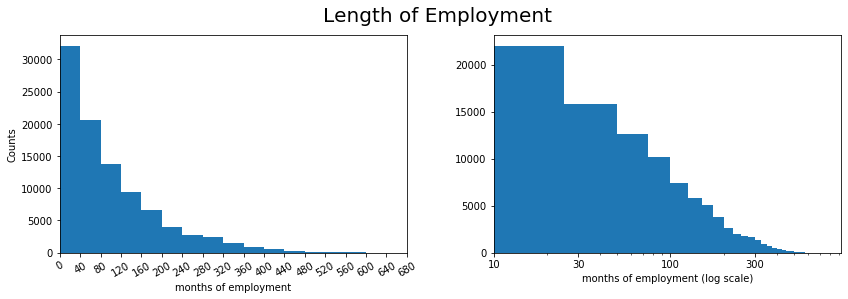

In [4]:
# Visualization 2: Histogram for employment status duration (including log scale)
plt.figure(figsize = [14,4])
plt.subplots_adjust(wspace = 0.25)

plt.subplot(1,2,1)
bins = np.arange(0, df['EmploymentStatusDuration'].max()+40, 40)
labels = ['{}'.format(val) for val in bins]
plt.hist(data = df, x = 'EmploymentStatusDuration', bins = bins)
plt.xlabel('months of employment')
plt.xticks(bins, labels, rotation = 30)
plt.xlim(0,680)
plt.ylabel('Counts')
plt.suptitle('Length of Employment', size = 20);

plt.subplot(1,2,2)
bins = np.arange(0, df['EmploymentStatusDuration'].max()+25, 25)
ticks = [10, 30, 100, 300]
labels = ['{}'.format(val) for val in ticks]
plt.hist(data = df, x = 'EmploymentStatusDuration', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('months of employment (log scale)')
plt.ylabel('');

## Stated Monthly Income Distribution

There is a right-skewed distribution of data for stated monthly incomes.  The majority of stated monthly incomes fall in less than 20K.  The box plot describes the five data points for clearly: minimum value, 25%, median, 75%, and maximum value with numerous outliers.  

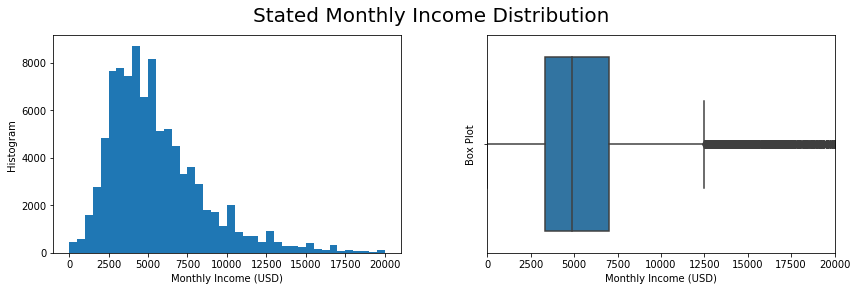

In [5]:
# Visualization 3: stated monthly income data
plt.figure(figsize = [14,4])
plt.subplots_adjust(wspace = 0.25)

plt.xlabel('Stated Monthly Income (USD)')
plt.ylabel('Count');
plt.subplot(1,2,1)
bins = np.arange(0, 20000+500, 500)
plt.hist(data = df, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('Monthly Income (USD)', size = 10)
plt.ylabel('Histogram')
plt.suptitle('Stated Monthly Income Distribution', size = 20);

plt.subplot(1,2,2)
sb.boxplot(data = df, x = 'StatedMonthlyIncome')
plt.xlabel('Monthly Income (USD)', size = 10)
plt.xlim(0,20000)
plt.ylabel('Box Plot');

## Employment Status Duration & Ranges

The following violin plots reveal the distribution if data in a given range over the length of employment.  The income range plots describe that those with a lower income are more likely to work for a shorter length of time, while those in higher paid positions tend to keep their jobs longer.  Likewise, individuals with lower credit score ranges have short employment durations, while individuals with higher credit score ranges have longer employment durations

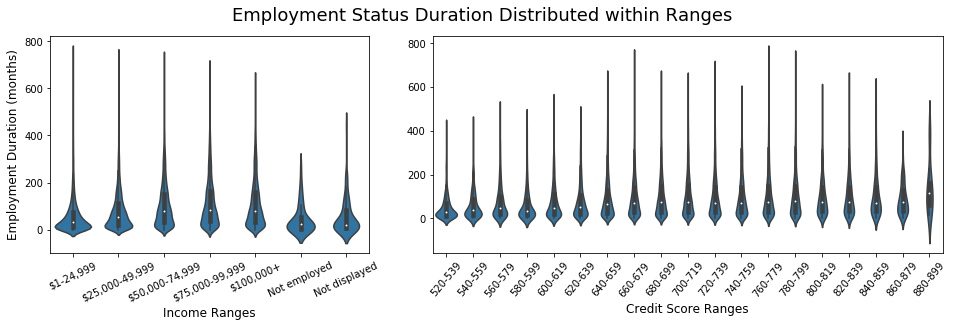

In [6]:
# Visualization 4: violin plots for income & credit score ranges for employment durations
plt.figure(figsize = [16,4])
plt.subplots_adjust(wspace = 0.5)
# set up subplot grid
gridspec.GridSpec(1,5)

plt.subplot2grid((1,5), (0,0), colspan = 2, rowspan = 1)
inrange_order = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not employed', 'Not displayed']
sb.violinplot(data = df, x = 'IncomeRange', y = 'EmploymentStatusDuration', color = base_color, order = inrange_order)
plt.xlabel('Income Ranges', size = 12)
plt.xticks(rotation = 25)
plt.ylabel('Employment Duration (months)', size = 12)
plt.suptitle('Employment Status Duration Distributed within Ranges', size = 18);

plt.subplot2grid((1,5), (0,2), colspan = 3, rowspan = 1)
sb.violinplot(data = df, x = 'CreditScoreRange', y = 'EmploymentStatusDuration', color = base_color, order = csrange_order)
plt.xlabel('Credit Score Ranges', size = 12)
plt.xticks(rotation = 50)
plt.ylabel('');

## Homeowners | Employment Status Duration

We have already discovered that there are more homeowners than not.  It is also evident from the box plots that homeowners tend to work longer in positions than those who do not own a home.  Thus we see a relationship to longer employment and owning a home.

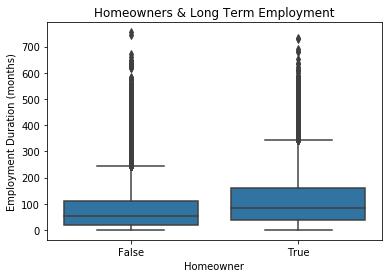

In [7]:
# Visualization 5: box plots of homeowners & employment duration
sb.boxplot(data = df, x = 'IsBorrowerHomeowner', y = 'EmploymentStatusDuration', color = base_color)
plt.xlabel('Homeowner')
plt.ylabel('Employment Duration (months)')
plt.title('Homeowners & Long Term Employment');

## Comparison of Owning a Home & Not

These count plots compare the number of individuals who own a home to those who do not.  There are more non-homeowners with lower incomes than homeowners, and there are more homeowners with higher incomes than non-homeowners.  The credit score ranges have a very similar distribution of differences: the lower the credit score the more non-homeowners, while the higher the credit score the more abundant homeowners.  This reveals a strong correlation to owning a home and having higher income with a higher credit score.

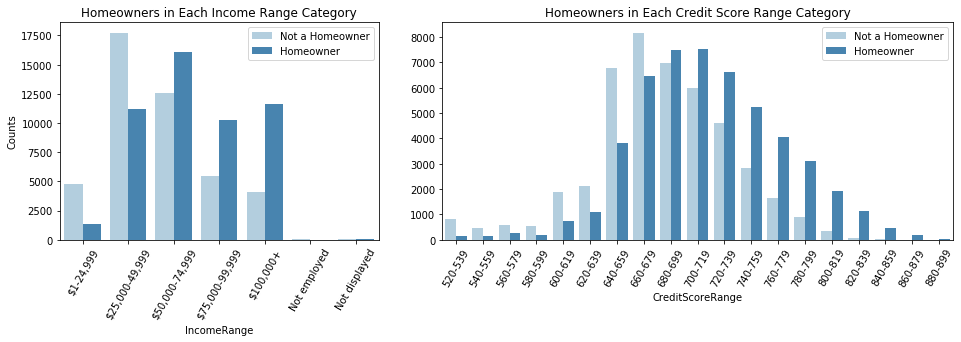

In [8]:
# Visualization 6: count plots for homeowners and non-homeowners
plt.figure(figsize = [16,4])
plt.subplots_adjust(wspace = 0.5)
# set up subplot grid
gridspec.GridSpec(1,5)

# Compare homeowner status to income range
plt.subplot2grid((1,5), (0,0), colspan = 2, rowspan = 1)
sb.countplot(data = df, x = 'IncomeRange', hue = 'IsBorrowerHomeowner', palette = 'Blues', order = inrange_order)
l = plt.legend()
l.get_texts()[0].set_text('Not a Homeowner')
l.get_texts()[1].set_text('Homeowner')
plt.xticks(rotation = 60)
plt.title('Homeowners in Each Income Range Category')
plt.ylabel('Counts');

# Compare homeowner status to credit score range
plt.subplot2grid((1,5), (0,2), colspan = 3, rowspan = 1)
sb.countplot(data = df, x = 'CreditScoreRange', hue = 'IsBorrowerHomeowner', palette = 'Blues', order = csrange_order)
l = plt.legend(loc = 1)
l.get_texts()[0].set_text('Not a Homeowner')
l.get_texts()[1].set_text('Homeowner')
plt.xticks(rotation = 60)
plt.title('Homeowners in Each Credit Score Range Category')
plt.ylabel('');

## Ranges, Ratios & Owners

A point plot represents an estimated center of tendency for a numeric variable of scatter plot points positions.  The plot provides some indication of the uncertainty around that estimation using error bars. Point plots help focus on comparisons between different levels of one or more categorical variables.  In this point plot, central tendencies for the relationship between credit score ranges and debt to income ratios are compared between homeowner and non-homeowners.  It would seem that those with low or high credit scores have a greater spread of data points, whereas the middle range of credit scores is highly accurate.  I would say that in general, homeowners have lower debt to income ratios within credit score range categories.

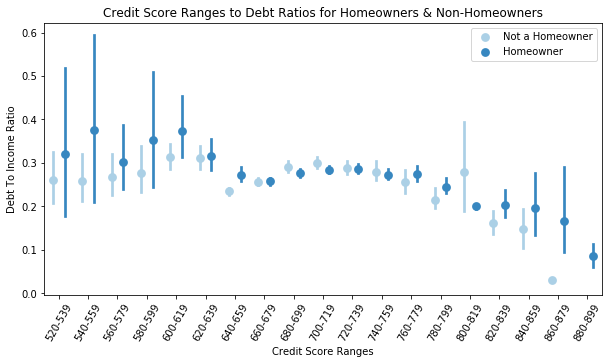

In [13]:
# Visualization 7: Pointplot for homeowners, credit score range, and debt to income ratio
fig = plt.figure(figsize = [10,5])
ax = sb.pointplot(data = df, x = 'CreditScoreRange', y = 'DebtToIncomeRatio', hue = 'IsBorrowerHomeowner',
           palette = 'Blues', order = csrange_order, linestyles = '', dodge = 0.4)
plt.title('Credit Score Ranges to Debt Ratios for Homeowners & Non-Homeowners')
plt.xlabel('Credit Score Ranges')
plt.ylabel('Debt To Income Ratio')
l = plt.legend()
l.get_texts()[0].set_text('Not a Homeowner')
l.get_texts()[1].set_text('Homeowner')
ax.set_yticklabels([],minor = True)
plt.xticks(rotation = 60)
plt.show();

## Income Range | Employment Duration | Debt Ratio

My final visualization is a facet grid to illustrate the relationship between debt to income ratio over employment status durations within each income range.  These scatter plots give an insight into individuals who earn more money have lower debt ratios, while those who earn less could have much higher debt ratios.  

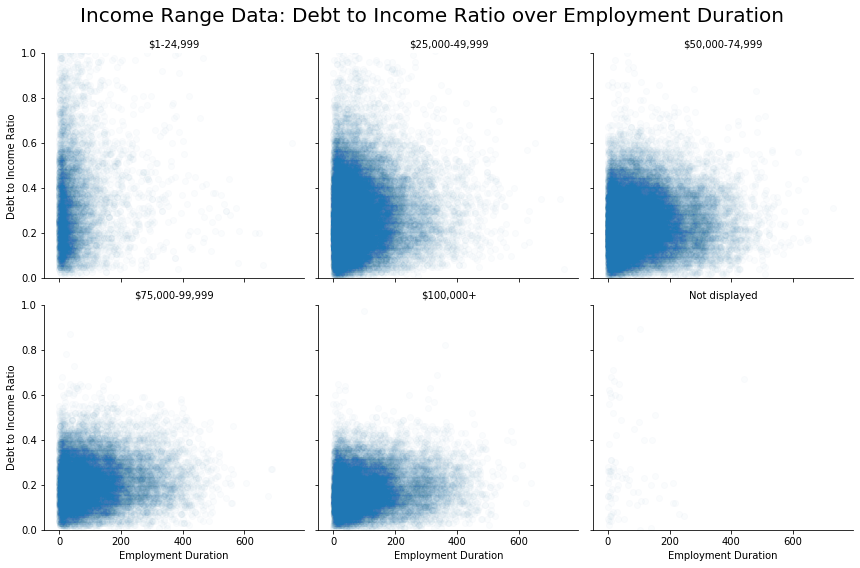

In [29]:
# Visualization 8: facetgrid 
df_sub = df.loc[df['IncomeRange'].isin(['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not displayed'])]
order = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not displayed']
g = sb.FacetGrid(data = df_sub, col = 'IncomeRange', size = 4, col_wrap = 3, col_order = order)
g.map(sb.regplot, 'EmploymentStatusDuration', 'DebtToIncomeRatio', x_jitter = 0.5, fit_reg = False, scatter_kws = {'alpha': 1/50})
g.set_xlabels('Employment Duration')
g.set_ylabels('Debt to Income Ratio')
plt.ylim(0,1)
g.set_titles('{col_name}')
plt.suptitle('Income Range Data: Debt to Income Ratio over Employment Duration', size = 20)
plt.subplots_adjust(top = 0.9);

## Final Visualization

I think I can conclude that individuals who earn more money have higher credit scores, less debt to income ratios, own their own home, and borrow more money.  This final point plot reveals that the central tendency of borrowers with higher incomes borrow more money.  It also reveals that individuals who earn more money, for the most part, have higher credit scores.  I hope tha I can be in that category myself one day!

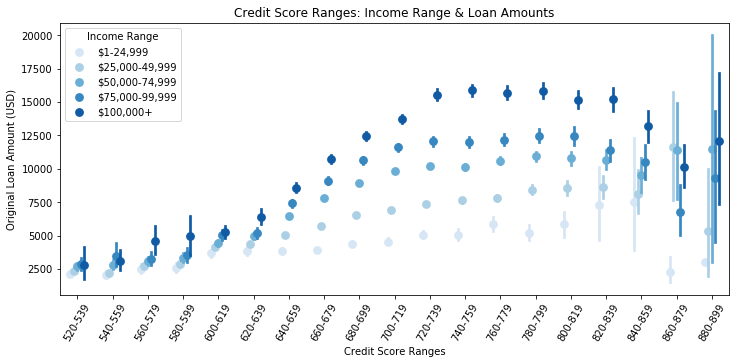

In [34]:
# Visualization 9: pointplot for income range within credit score ranges given loan amounts
fig = plt.figure(figsize = [12,5])
df_sub = df.loc[df['IncomeRange'].isin(['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'])]
order = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
ax = sb.pointplot(data = df_sub, x = 'CreditScoreRange', y = 'LoanOriginalAmount', order = csrange_order, hue = 'IncomeRange', hue_order = order,
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Credit Score Ranges: Income Range & Loan Amounts')
plt.xlabel('Credit Score Ranges')
plt.ylabel('Original Loan Amount (USD)')
plt.xticks(rotation = 60)
plt.legend(title = 'Income Range')
plt.show();

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!